# COVIT-19 Data Analisys

## Get Public DataSets for COVIT-19
Extract last data published

In [1]:
import urllib
import datetime
dt = datetime.datetime.today()
year = dt.strftime('%Y')
month = dt.strftime('%m')
day = dt.strftime('%d')
# Mundial Data
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
# url_of_file = f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{year}-{month}-{day}.xlsx'
url_of_file = f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)

https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx


('COVIT-19-202041.xls', <http.client.HTTPMessage at 0x7f0f6d012908>)

## Prepare and Clean Data
Build DataSet to work

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt

# Read Data
dt = datetime.datetime.today()
file = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
df = pd.read_excel(file)

# Prepare Dataset
data = pd.DataFrame(df, columns= ['dateRep', 'day','month', 'year', 'cases', 'deaths', 'countriesAndTerritories'])
data = data.rename(columns={"dateRep": "Date", "countriesAndTerritories": "Country", "cases":"Cases", "deaths": "Deaths", "month": "Month", "day": "Day"})

# Filter Dataset
data = data[data['Cases'] > 0]
data['Period'] = data['Month']*100+data['Day']
data = data.sort_values(['Country', 'Date'], ascending=[True, True])

# Index DataSet
data['Id'] = data.groupby(['Country']).cumcount()

# Prepare data
ant = data.iloc[0]['Cases']
antd = data.iloc[0]['Deaths']
ants = 0
country = data.iloc[0]['Country']
i = 0
c = [] # cases
d = [] # deaths
s = [] # start deaths
p = [] # impact

death = False
for i in range(i, len(data)):

  # Validate start first death
  if country == data.iloc[i]['Country']:
    if death == False and data.iloc[i]['Deaths'] > 0:
      death = True
  else:
    death = False

  # Sumarize
  Cases = (data.iloc[i]['Cases'] + (ant if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Cases']
  Deaths = (data.iloc[i]['Deaths'] + (antd if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Deaths']
  StartDeaths = 1 if country == data.iloc[i]['Country'] and death else 0
  Impact = Deaths / (0 if Cases == 0 else Cases) * 100
  
  
  # Append cases
  c.append(Cases)
  d.append(Deaths)
  s.append(StartDeaths)
  p.append(Impact)
  ant = Cases
  antd = Deaths
  ants = StartDeaths
  country = data.iloc[i]['Country']

data["Total_Cases"] = c
data["Total_Deaths"] = d
data['StartDeaths'] = s
data['Impact'] = p


# Index DataSet start by deaths
data = data[data['StartDeaths'] == 1]
data['Id'] = data.groupby(['Country']).cumcount()

data.head(50)

,Date,Day,Month,year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths,StartDeaths,Impact
8,2020-03-24,24,3,2020,6,1,Afghanistan,324,0,40,1,1,2.500000
7,2020-03-25,25,3,2020,2,0,Afghanistan,325,1,42,1,1,2.380952
6,2020-03-26,26,3,2020,33,0,Afghanistan,326,2,75,1,1,1.333333
4,2020-03-28,28,3,2020,16,1,Afghanistan,328,3,91,2,1,2.197802
3,2020-03-29,29,3,2020,15,1,Afghanistan,329,4,106,3,1,2.830189
2,2020-03-30,30,3,2020,8,1,Afghanistan,330,5,114,4,1,3.508772
1,2020-03-31,31,3,2020,27,0,Afghanistan,331,6,141,4,1,2.836879
0,2020-04-01,1,4,2020,25,0,Afghanistan,401,7,166,4,1,2.409639
112,2020-03-12,12,3,2020,1,1,Albania,312,0,11,1,1,9.090909
111,2020-03-13,13,3,2020,12,0,Albania,313,1,23,1,1,4.347826


# Compare Virus Propagation Mexico vs Spain, Italy and EU By days
Compare COVIT-19 propagation in Mexico with Spain, Italy and EU

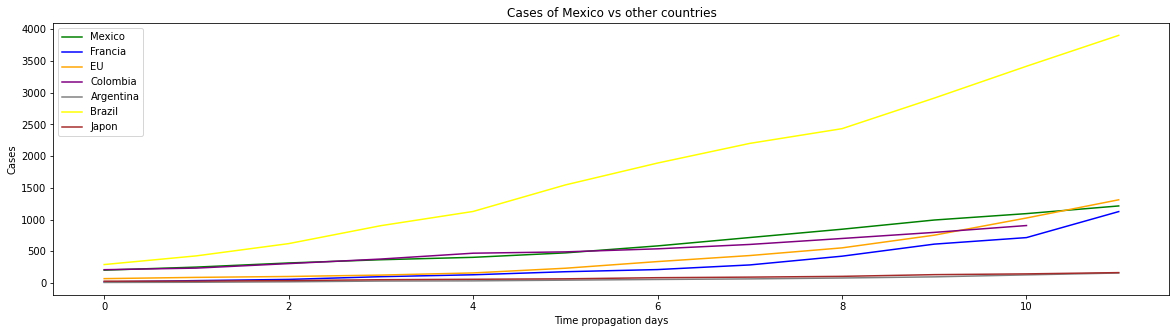

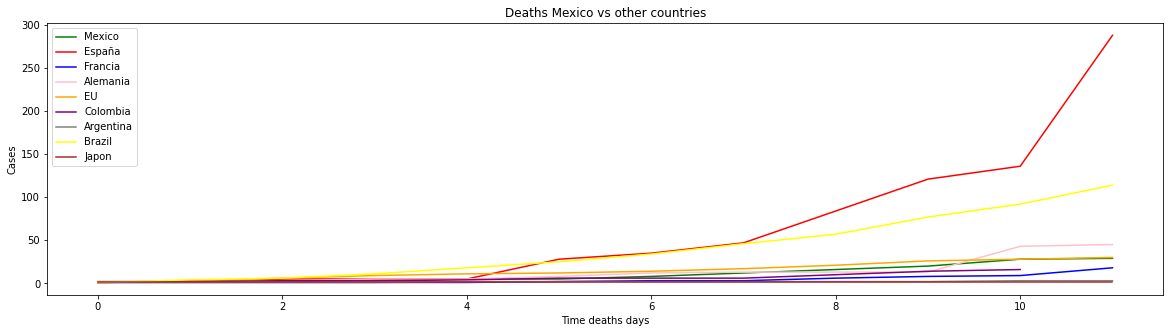

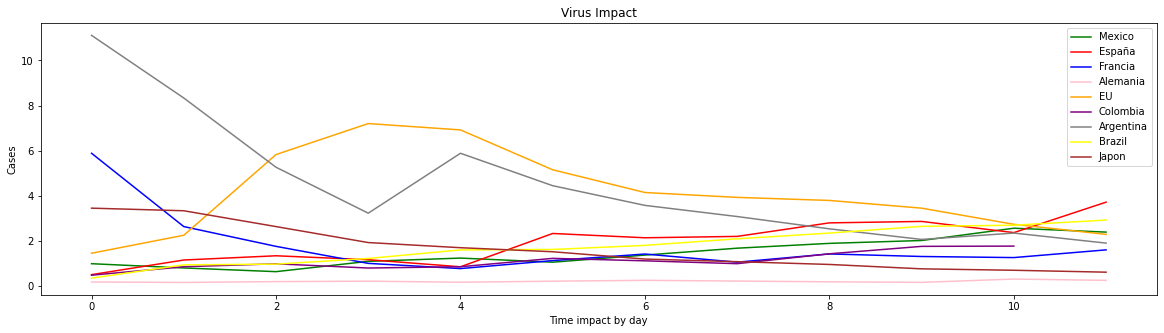

,Date,Day,Month,year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths,StartDeaths,Impact
4863,2020-03-21,21,3,2020,39,2,Mexico,321,0,203,2,1,0.985222
4862,2020-03-22,22,3,2020,48,0,Mexico,322,1,251,2,1,0.796813
4861,2020-03-23,23,3,2020,65,0,Mexico,323,2,316,2,1,0.632911
4860,2020-03-24,24,3,2020,51,2,Mexico,324,3,367,4,1,1.089918
4859,2020-03-25,25,3,2020,38,1,Mexico,325,4,405,5,1,1.234568
4858,2020-03-26,26,3,2020,70,0,Mexico,326,5,475,5,1,1.052632
4857,2020-03-27,27,3,2020,110,3,Mexico,327,6,585,8,1,1.367521
4856,2020-03-28,28,3,2020,132,4,Mexico,328,7,717,12,1,1.673640
4855,2020-03-29,29,3,2020,131,4,Mexico,329,8,848,16,1,1.886792
4854,2020-03-30,30,3,2020,145,4,Mexico,330,9,993,20,1,2.014099


In [16]:
# Filter by country
mexico = data[(data['Country'] == 'Mexico')]
spain = data[(data['Country'] == 'Spain')]
spain = spain[spain['Id'] < len(mexico) ]
eu = data[(data['Country'] == 'United_States_of_America')]
eu = eu[eu['Id'] < len(mexico) ]
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] < len(mexico) ]
colombia = data[(data['Country'] == 'Colombia')]
colombia = colombia[colombia['Id'] < len(mexico) ]
argentina = data[(data['Country'] == 'Argentina')]
argentina = argentina[argentina['Id'] < len(mexico) ]
brazil = data[(data['Country'] == 'Brazil')]
brazil = brazil[brazil['Id'] < len(mexico) ]
germany = data[(data['Country'] == 'Germany')]
germany = germany[germany['Id'] < len(mexico)]
japan = data[(data['Country'] == 'Japan')]
japan = japan[japan['Id'] < len(mexico)]
france = data[(data['Country'] == 'France')]
france = france[france['Id'] < len(mexico)]

#result_compare = mexico.merge(spain, left_on=['Id'], right_on=['Id'], suffixes=('', '_es'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Country_es','Cases_es','Deaths_es','Total_Cases_es','Total_Deaths_es']]
#result_compare = result_compare.merge(eu, left_on=['Id'], right_on=['Id'], suffixes=('', '_eu'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Period_eu','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu']]
#result_compare = result_compare.merge(italy, left_on=['Id'], right_on=['Id'], suffixes=('', '_it'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu','Period_it','Cases_it','Deaths_it','Total_Cases_it','Total_Deaths_it']]

ax = plt.gca()

mexico.plot(kind='line',x='Id',y='Total_Cases', color='green', ax=ax, label="Mexico", title='Cases of Mexico vs other countries', figsize=(20,5))
# spain.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, label="España")
france.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, figsize=(20,5), label="Francia")
eu.plot(kind='line', x='Id',y='Total_Cases', color='orange', ax=ax, label="EU")
colombia.plot(kind='line',x='Id',y='Total_Cases', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Total_Cases', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Total_Cases', color='yellow', ax=ax, label="Brazil")
# germany.plot(kind='line',x='Id',y='Total_Cases', color='pink', ax=ax, label="Alemania")
japan.plot(kind='line',x='Id',y='Total_Cases', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

mexico.plot(kind='line',x='Id',y='Total_Deaths', color='green', ax=ax, label="Mexico", title='Deaths Mexico vs other countries', figsize=(20,5))
spain.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, label="España")
france.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, label="Francia")
germany.plot(kind='line',x='Id',y='Total_Deaths', color='pink', ax=ax, label="Alemania")
eu.plot(kind='line', x='Id',y='Total_Deaths', color='orange', ax=ax, label="EU")
colombia.plot(kind='line',x='Id',y='Total_Deaths', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Total_Deaths', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Total_Deaths', color='yellow', ax=ax, label="Brazil")
japan.plot(kind='line',x='Id',y='Total_Deaths', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

mexico.plot(kind='line',x='Id',y='Impact', color='green', ax=ax, label="Mexico", title='Virus Impact', figsize=(20,5))
spain.plot(kind='line',x='Id',y='Impact', color='red', ax=ax, label="España")
france.plot(kind='line',x='Id',y='Impact', color='blue', ax=ax, label="Francia")
germany.plot(kind='line',x='Id',y='Impact', color='pink', ax=ax, label="Alemania")
eu.plot(kind='line', x='Id',y='Impact', color='orange', ax=ax, label="EU")
colombia.plot(kind='line',x='Id',y='Impact', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Impact', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Impact', color='yellow', ax=ax, label="Brazil")
japan.plot(kind='line',x='Id',y='Impact', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time impact by day")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

mexico.head(50)

#result_compare.head(50)

# Future propagation days in other countries

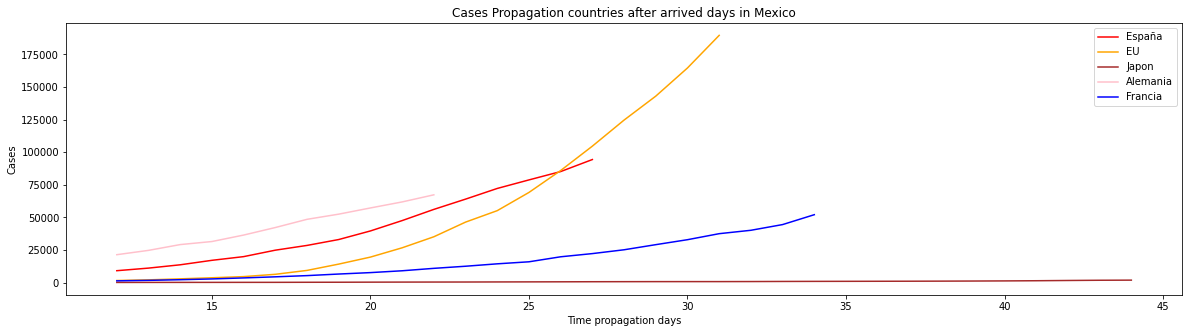

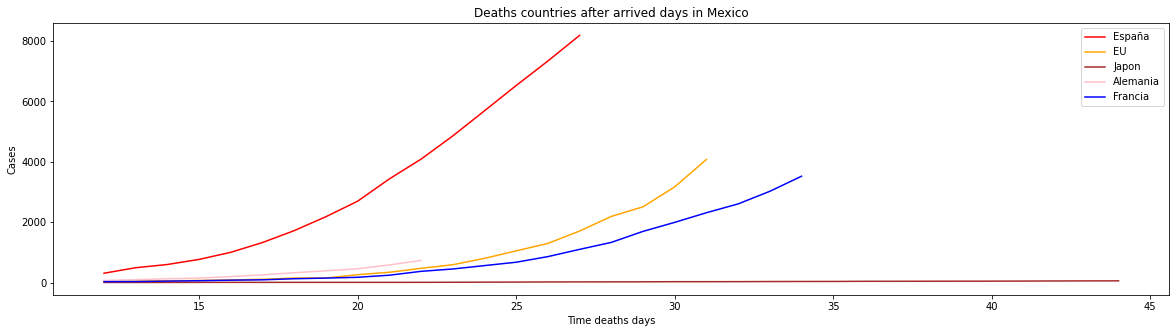

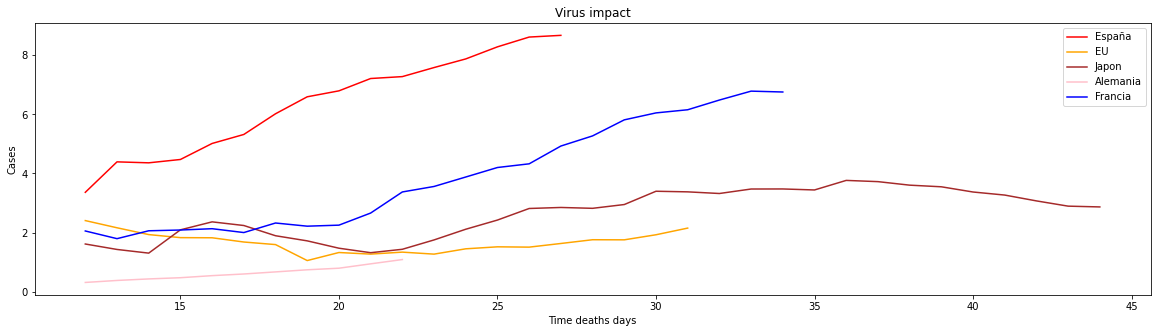

,Date,Day,Month,year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths,StartDeaths,Impact
4075,2020-02-27,27,2,2020,22,2,Japan,227,12,186,3,1,1.612903
4074,2020-02-28,28,2,2020,24,0,Japan,228,13,210,3,1,1.428571
4073,2020-02-29,29,2,2020,20,0,Japan,229,14,230,3,1,1.304348
4072,2020-03-01,1,3,2020,9,2,Japan,301,15,239,5,1,2.092050
4071,2020-03-02,2,3,2020,15,1,Japan,302,16,254,6,1,2.362205
4069,2020-03-04,4,3,2020,14,0,Japan,304,17,268,6,1,2.238806
4068,2020-03-05,5,3,2020,49,0,Japan,305,18,317,6,1,1.892744
4067,2020-03-06,6,3,2020,32,0,Japan,306,19,349,6,1,1.719198
4066,2020-03-07,7,3,2020,59,0,Japan,307,20,408,6,1,1.470588
4065,2020-03-08,8,3,2020,47,0,Japan,308,21,455,6,1,1.318681


In [17]:
# Filter by country
spain = data[(data['Country'] == 'Spain')]
spain = spain[spain['Id'] >= len(mexico) ]
eu = data[(data['Country'] == 'United_States_of_America')]
eu = eu[eu['Id'] >= len(mexico) ]
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] >= len(mexico) ]
japan = data[(data['Country'] == 'Japan')]
japan = japan[japan['Id'] >= len(mexico)]
china = data[(data['Country'] == 'China')]
china = china[china['Id'] >= len(mexico)]
german = data[(data['Country'] == 'Germany')]
german = german[german['Id'] >= len(mexico)]
france = data[(data['Country'] == 'France')]
france = france[france['Id'] >= len(mexico)]

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, title='Cases Propagation countries after arrived days in Mexico', figsize=(20,5), label="España")
eu.plot(kind='line', x='Id',y='Total_Cases', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Total_Cases', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Total_Cases', color='pink', ax=ax, label="Alemania")
france.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, label="Francia")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, title='Deaths countries after arrived days in Mexico', figsize=(20,5), label="España")
eu.plot(kind='line', x='Id',y='Total_Deaths', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Total_Deaths', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Total_Deaths', color='pink', ax=ax, label="Alemania")
france.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, label="Francia")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Impact', color='red', ax=ax, title='Virus impact', figsize=(20,5), label="España")
eu.plot(kind='line', x='Id',y='Impact', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Impact', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Impact', color='pink', ax=ax, label="Alemania")
france.plot(kind='line',x='Id',y='Impact', color='blue', ax=ax, label="Francia")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

japan.head(50)

# Worse of Cases

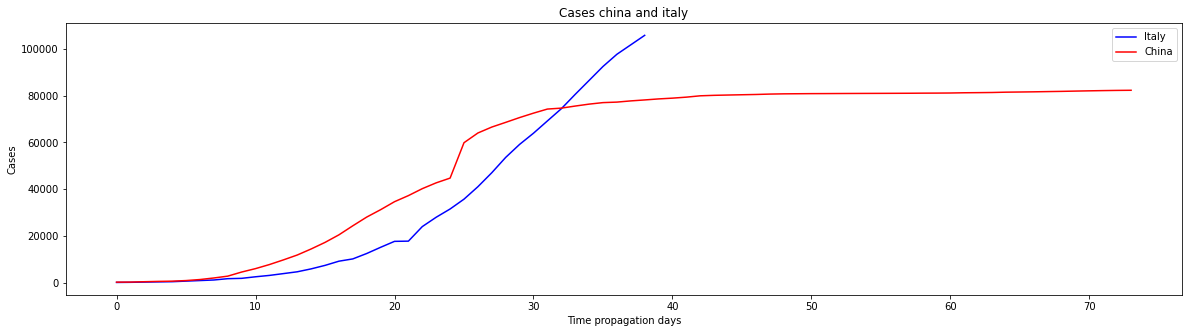

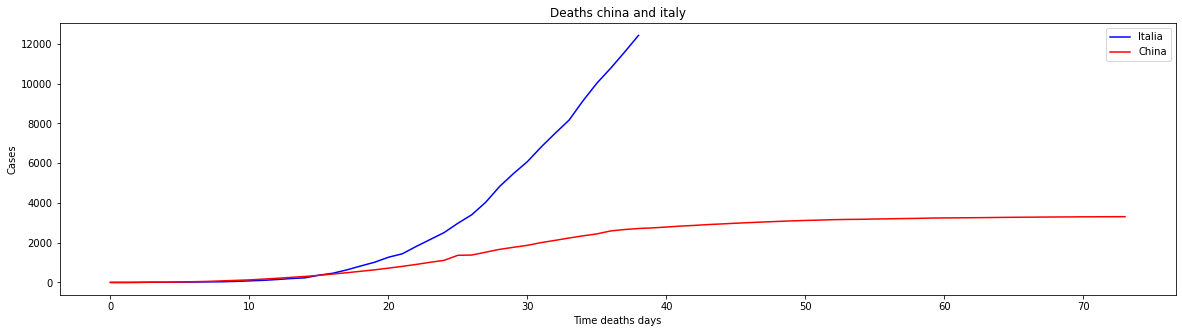

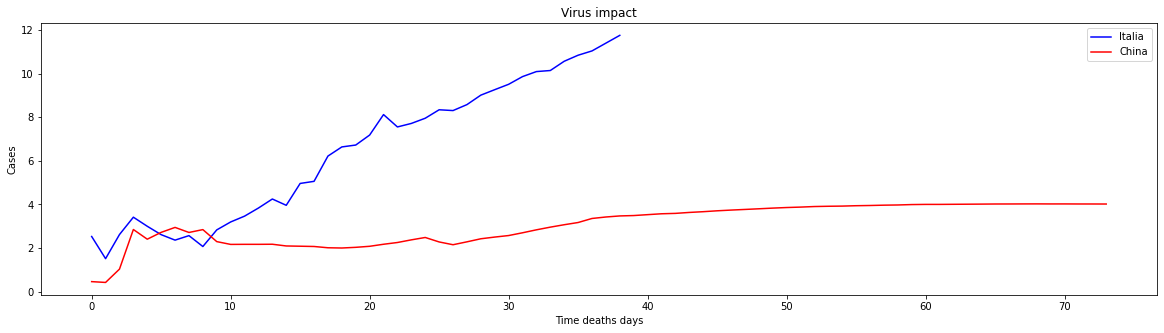

,Date,Day,Month,year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths,StartDeaths,Impact
3966,2020-02-23,23,2,2020,62,2,Italy,223,0,79,2,1,2.531646
3965,2020-02-24,24,2,2020,53,0,Italy,224,1,132,2,1,1.515152
3964,2020-02-25,25,2,2020,97,4,Italy,225,2,229,6,1,2.620087
3963,2020-02-26,26,2,2020,93,5,Italy,226,3,322,11,1,3.416149
3962,2020-02-27,27,2,2020,78,1,Italy,227,4,400,12,1,3.000000
3961,2020-02-28,28,2,2020,250,5,Italy,228,5,650,17,1,2.615385
3960,2020-02-29,29,2,2020,238,4,Italy,229,6,888,21,1,2.364865
3959,2020-03-01,1,3,2020,240,8,Italy,301,7,1128,29,1,2.570922
3958,2020-03-02,2,3,2020,561,6,Italy,302,8,1689,35,1,2.072232
3957,2020-03-03,3,3,2020,146,17,Italy,303,9,1835,52,1,2.833787


In [18]:
# Filter by country
italy = data[(data['Country'] == 'Italy')]
china = data[(data['Country'] == 'China')]

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, title='Cases china and italy', figsize=(20,5), label="Italy")
china.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, label="China")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, title='Deaths china and italy', figsize=(20,5), label="Italia")
china.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, label="China")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Impact', color='blue', ax=ax, title='Virus impact', figsize=(20,5), label="Italia")
china.plot(kind='line',x='Id',y='Impact', color='red', ax=ax, label="China")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

italy.head(50)

## Evolution of the Virus
Next days virus propagation

In [0]:
# Building

# Test for build interactive Dashboard



In [0]:
from IPython.display import display
from IPython.html.widgets import *
from ipywidgets import widgets

text = widgets.Text()
display(text)

def handle_submit(sender):
  print(text.value)

text.on_submit(handle_submit)

def f(x):
  print(x)

interact(f,x=10)

10


<function __main__.f>